In [1]:
import optforge as of
from pypop7.optimizers.pso import SPSO
from optforge.benchmark.vobench_benchmarks import VOBenchmark
import vobench as vb
import numpy as np

inputs = vb.imread(r"F:\Stuff\Programming\AI\VOBench\notebooks\affine\A2.jpeg")[:,:,0]
targets = vb.imread(r"F:\Stuff\Programming\AI\VOBench\notebooks\affine\A.jpeg")[:,:,0]

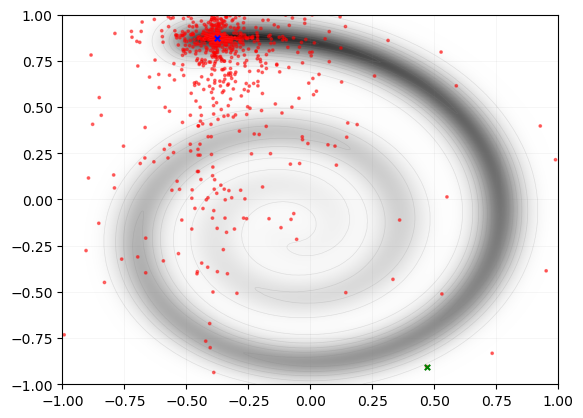

In [5]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

problem = {'fitness_function': vob.step_noline,  # cost function
           'ndim_problem': 2,  # dimension
           'lower_boundary': np.array((-1., -1.)),  # lower search boundary
           'upper_boundary': np.array((1.,1.))  # lower search boundary
           }

options = {'fitness_threshold': 1e-10,  # terminate when the best-so-far fitness is lower than this threshold
           'seed_rng': 0,  # seed of random number generation (which must be explicitly set for repeatability)
           'max_function_evaluations': 1000,
           'x': np.zeros(2),  # initial mean of search (mutation/sampling) distribution
           'sigma':0.5,  # initial global step-size of search distribution (not necessarily optimal)
           'verbose': False
        }

spso = SPSO(problem, options)  # initialize the optimizer
results = spso.optimize()  # run its (time-consuming) search process

vob.plot()

evals: 1000/1000 | best value: 0.0257                            
Job finished in 0.3s., did 1000 evaluations.


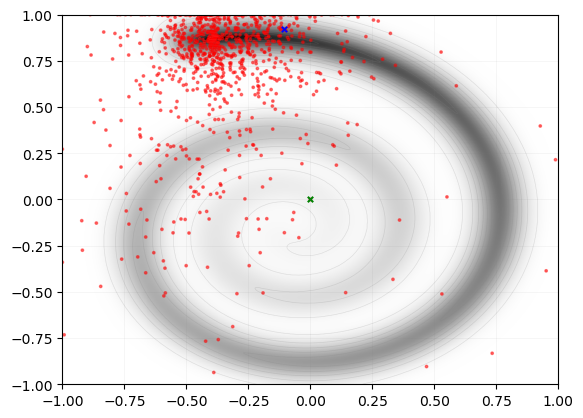

In [7]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = of.integrations.PyPop7Optimizer(
    SPSO,
    seed_rng=0
)

study = of.minimize(
    vob.step_noline,
    np.zeros_like(vob.params),
    optimizer,
    max_evals = 1000,
    bounds = (-1, 1)
)

vob.plot()